In [1]:
import os
import sys
import subprocess
import re
import numpy as np
import datetime
import itertools
from itertools import islice
from functools import reduce
from itertools import accumulate
import pandas as pd
from utils import *
from matplotlib import pyplot as plt
from IPython import display, get_ipython

import os
os.environ['SE_EPHE_PATH'] = 'ephe'
# cleanup()

In [2]:
swetest = "./swe_unix_src_2.10.03/src/swetest"
exportPath = './export/'
marketPath = './market/'
imgPath = './image/'

center = (
    # 'geo'
    'helio'
    # '1' # moon
    # '2' # mercury
    # '3' # venus
    # '4' # mars
    
    )

In [3]:
def test(testCommand):
    p = subprocess.Popen(testCommand,
    shell=True,
    stdin=None,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE )
    lines = p.communicate()[0].decode('utf-8').splitlines()
    return lines

In [4]:
# to see the keys to the planet bodies use ./swetest -hplan 
testCommand = './swe_unix_src_2.10.03/src/swetest -hplan'
output = test(testCommand)  
for item in output:
    print(f"{item}")


  Planet selection letters:
     planetary lists:
        d (default) main factors 0123456789mtABCcg
        p main factors as above, plus main asteroids DEFGHI
        h ficticious factors J..X
        a all factors
        (the letters above can only appear as a single letter)

     single body numbers/letters:
        0 Sun (character zero)
        1 Moon (character 1)
        2 Mercury
        3 Venus
        4 Mars
        5 Jupiter
        6 Saturn
        7 Uranus
        8 Neptune
        9 Pluto
        m mean lunar node
        t true lunar node
        n nutation
        o obliquity of ecliptic
	q delta t
	y time equation
	b ayanamsha
        A mean lunar apogee (Lilith, Black Moon) 
        B osculating lunar apogee 
        c intp. lunar apogee 
        g intp. lunar perigee 
        C Earth (in heliocentric or barycentric calculation)
        For planets Jupiter to Pluto the center of body (COB) can be
        calculated using the additional parameter -cob
     dwarf pla

In [5]:
"""
column names 
"""

# remove body from all if it's planeto center
a = '0123456789mtABcgDEFGHIJKLMNOPQRSTUVWXYZw'
a = a.replace(center, '')
print(a)  

if center == 'geo':
    body = (
    'a' # helio or geo
    # '1' # moon single
       )
if center == 'helio':
    body = (
    'a' # helio or geo
    # '1' # moon single
       )
else:
    body = (
    a # planeto
    # '1' # moon single
       )


# handle error about center and planet are the same if using specified body istead of all bodies
if center == body:
    print("center and body cannot be the same.")
    raise KeyboardInterrupt

    
if center == 'geo':
    testCommand = './swe_unix_src_2.10.03/src/swetest -p' + body +' -b1.1.2024 -n1 -s1 -fdP -roundmin -g, -head -sid30'
if center == 'helio':
    testCommand = './swe_unix_src_2.10.03/src/swetest -p' + body +' -b1.1.2024 -n1 -s1 -fdP -roundmin -g, -hel -head -sid30'
else:
    testCommand = './swe_unix_src_2.10.03/src/swetest -p' + body +' -b1.1.2024 -n1 -s1 -fdP -roundmin -g, -pc' + center + ' -head -sid30'    


    
testPlanets = test(testCommand)    
# handle error about center and planet are the same
testPlanets = [string for string in testPlanets if string and "error" not in string]


print(len(testPlanets))


planets = []

for item in testPlanets:
    name = item.split(',')[1].strip()
    print(f"'{name}',")
    planets.append(name)
    
print(planets)

0123456789mtABcgDEFGHIJKLMNOPQRSTUVWXYZw
36
'Moon',
'Mercury',
'Venus',
'Mars',
'Jupiter',
'Saturn',
'Uranus',
'Neptune',
'Pluto',
'Earth',
'intp. Apogee',
'intp. Perigee',
'Chiron',
'Pholus',
'Ceres',
'Pallas',
'Juno',
'Vesta',
'Cupido',
'Hades',
'Zeus',
'Kronos',
'Apollon',
'Admetos',
'Vulcanus',
'Poseidon',
'Isis-Transpluto',
'Nibiru',
'Harrington',
'Leverrier (Neptune)',
'Adams (Neptune)',
'Lowell (Pluto)',
'Pickering (Pluto)',
'Vulcan',
'Selena/White Moon',
'Waldemath',
['Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto', 'Earth', 'intp. Apogee', 'intp. Perigee', 'Chiron', 'Pholus', 'Ceres', 'Pallas', 'Juno', 'Vesta', 'Cupido', 'Hades', 'Zeus', 'Kronos', 'Apollon', 'Admetos', 'Vulcanus', 'Poseidon', 'Isis-Transpluto', 'Nibiru', 'Harrington', 'Leverrier (Neptune)', 'Adams (Neptune)', 'Lowell (Pluto)', 'Pickering (Pluto)', 'Vulcan', 'Selena/White Moon', 'Waldemath']


In [6]:
if center == 'geo':
    ephes = { # geo
    "declination":     [swetest + " -pbody -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
    "longitude":       [swetest + " -pbody -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
    "latitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fb -roundmin -g, -head -hor -sid30"],
    "distance":        [swetest + " -pbody -b1.1.year -ndays -s1 -fw -roundmin -g, -head -hor -sid30"],
    "speed":           [swetest + " -pbody -b1.1.year -ndays -s1 -fs -roundmin -g, -head -hor -sid30"],
    "right_asc":       [swetest + " -pbody -b1.1.year -ndays -s1 -fa -roundmin -g, -head -hor -sid30"],
    "meridian_dst":    [swetest + " -pbody -b1.1.year -ndays -s1 -fm -roundmin -g, -head -hor -sid30"],
    "zenith_dst":      [swetest + " -pbody -b1.1.year -ndays -s1 -fz -roundmin -g, -head -hor -sid30"],
    "azimuth":         [swetest + " -pbody -b1.1.year -ndays -s1 -fi -roundmin -g, -head -hor -sid30"],
    "altitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fh -roundmin -g, -head -hor -sid30"],
    "ecliptical":      [swetest + " -pbody -b1.1.year -ndays -s1 -fX -roundmin -g, -head -hor -sid30"],
    "equatorial":      [swetest + " -pbody -b1.1.year -ndays -s1 -fx -roundmin -g, -head -hor -sid30"],
    "uv_ecliptical":   [swetest + " -pbody -b1.1.year -ndays -s1 -fU -roundmin -g, -head -hor -sid30"],
    "uv_equatorial":   [swetest + " -pbody -b1.1.year -ndays -s1 -fu -roundmin -g, -head -hor -sid30"],
    "house_pos":       [swetest + " -pbody -b1.1.year -ndays -s1 -fg -roundmin -g, -head -hor -sid30"],
    "house_num":       [swetest + " -pbody -b1.1.year -ndays -s1 -fj -roundmin -g, -head -hor -sid30"],
    "zodiac":          [swetest + " -pbody -b1.1.year -ndays -s1 -fZ -roundmin -g, -head -hor -sid30"],
    "sirius_dec":      [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
    "sirius_long":     [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
    }

elif center == 'helio':
    ephes = { # helio
    "declination":     [swetest + " -pbody -b1.1.year -ndays -s1 -fd -roundmin -g, -hel -head -hor -sid30"],
    "longitude":       [swetest + " -pbody -b1.1.year -ndays -s1 -fl -roundmin -g, -hel -head -hor -sid30"],
    "latitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fb -roundmin -g, -hel -head -hor -sid30"],
    "distance":        [swetest + " -pbody -b1.1.year -ndays -s1 -fw -roundmin -g, -hel -head -hor -sid30"],
    "speed":           [swetest + " -pbody -b1.1.year -ndays -s1 -fs -roundmin -g, -hel -head -hor -sid30"],
    "right_asc":       [swetest + " -pbody -b1.1.year -ndays -s1 -fa -roundmin -g, -hel -head -hor -sid30"],
    "meridian_dst":    [swetest + " -pbody -b1.1.year -ndays -s1 -fm -roundmin -g, -hel -head -hor -sid30"],
    "zenith_dst":      [swetest + " -pbody -b1.1.year -ndays -s1 -fz -roundmin -g, -hel -head -hor -sid30"],
    "azimuth":         [swetest + " -pbody -b1.1.year -ndays -s1 -fi -roundmin -g, -hel -head -hor -sid30"],
    "altitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fh -roundmin -g, -hel -head -hor -sid30"],
    "ecliptical":      [swetest + " -pbody -b1.1.year -ndays -s1 -fX -roundmin -g, -hel -head -hor -sid30"],
    "equatorial":      [swetest + " -pbody -b1.1.year -ndays -s1 -fx -roundmin -g, -hel -head -hor -sid30"],
    "uv_ecliptical":   [swetest + " -pbody -b1.1.year -ndays -s1 -fU -roundmin -g, -hel -head -hor -sid30"],
    "uv_equatorial":   [swetest + " -pbody -b1.1.year -ndays -s1 -fu -roundmin -g, -hel -head -hor -sid30"],
    "house_pos":       [swetest + " -pbody -b1.1.year -ndays -s1 -fg -roundmin -g, -hel -head -hor -sid30"],
    "house_num":       [swetest + " -pbody -b1.1.year -ndays -s1 -fj -roundmin -g, -hel -head -hor -sid30"],
    "zodiac":          [swetest + " -pbody -b1.1.year -ndays -s1 -fZ -roundmin -g, -hel -head -hor -sid30"],
    "sirius_dec":      [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fd -roundmin -g, -hel -head -hor -sid30"],
    "sirius_long":     [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fl -roundmin -g, -hel -head -hor -sid30"],
    }
else:
    ephes = { # planetocentric
    "declination":     [swetest + " -pbody -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
    "longitude":       [swetest + " -pbody -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
    "latitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fb -roundmin -g, -head -hor -sid30"],
    "distance":        [swetest + " -pbody -b1.1.year -ndays -s1 -fw -roundmin -g, -head -hor -sid30"],
    "speed":           [swetest + " -pbody -b1.1.year -ndays -s1 -fs -roundmin -g, -head -hor -sid30"],
    "right_asc":       [swetest + " -pbody -b1.1.year -ndays -s1 -fa -roundmin -g, -head -hor -sid30"],
    "meridian_dst":    [swetest + " -pbody -b1.1.year -ndays -s1 -fm -roundmin -g, -head -hor -sid30"],
    "zenith_dst":      [swetest + " -pbody -b1.1.year -ndays -s1 -fz -roundmin -g, -head -hor -sid30"],
    "azimuth":         [swetest + " -pbody -b1.1.year -ndays -s1 -fi -roundmin -g, -head -hor -sid30"],
    "altitude":        [swetest + " -pbody -b1.1.year -ndays -s1 -fh -roundmin -g, -head -hor -sid30"],
    "ecliptical":      [swetest + " -pbody -b1.1.year -ndays -s1 -fX -roundmin -g, -head -hor -sid30"],
    "equatorial":      [swetest + " -pbody -b1.1.year -ndays -s1 -fx -roundmin -g, -head -hor -sid30"],
    "uv_ecliptical":   [swetest + " -pbody -b1.1.year -ndays -s1 -fU -roundmin -g, -head -hor -sid30"],
    "uv_equatorial":   [swetest + " -pbody -b1.1.year -ndays -s1 -fu -roundmin -g, -head -hor -sid30"],
    "house_pos":       [swetest + " -pbody -b1.1.year -ndays -s1 -fg -roundmin -g, -head -hor -sid30"],
    "house_num":       [swetest + " -pbody -b1.1.year -ndays -s1 -fj -roundmin -g, -head -hor -sid30"],
    "zodiac":          [swetest + " -pbody -b1.1.year -ndays -s1 -fZ -roundmin -g, -head -hor -sid30"],
    "sirius_dec":      [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fd -roundmin -g, -head -hor -sid30"],
    "sirius_long":     [swetest + " -pf -xfSirius -b1.1.year -ndays -s1 -fl -roundmin -g, -head -hor -sid30"],
    }

keys = [
"declination"     ,
"longitude"       ,
"latitude"        ,
"distance"        ,
"speed"           ,
"right_asc"       ,
"meridian_dst"    ,
"zenith_dst"      ,
"azimuth"         ,
"altitude"        ,
"ecliptical"      ,
"equatorial"      ,
"uv_ecliptical"   ,
"uv_equatorial"   ,
"house_pos"       ,
"house_num"       ,
"zodiac"          ,
"sirius_dec",
"sirius_long",
]


start = 1800
end = 1801
# end = 2200

years = range(start, end)


In [7]:
def createEphemeris(year,body,ephe):

    days = checkLeap(year)
    
    try:
        command = ephes[ephe][0]
    except KeyError:
        "command mismatch"
    
    command = updateCommand(command,body,year,days,center)
    
    
    # try:
    #     e = ephe.split('_')[0]
    # except ValueError:
    #     pass
        
        
    
    print(command)
    process = subprocess.Popen(command,
    shell=True,
    stdin=None,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE )
    lines = process.communicate()[0].decode('utf-8').splitlines()
    
    ephe_list = []
    
    def writeLine(l, body, ephe, key=None):
   
        if ephe == 'zodiac' and l not in planets:
            l = coorZodiac(l)
            # l = coorZodiac0(l)
        else: 
            l = cleanLine(l)
            
        # print(l)
        ephe_list.append(l)
        
       
    list(map(lambda l: writeLine(l, body, ephe), lines))
    
    df = pd.DataFrame(ephe_list)
    df = df[0].str.split(',', expand=True) # split 1 column into multiple columns by comma

   
    # print(df)
    
    # print(planets)
    if ephe == 'ecliptical' or ephe == 'equatorial' or ephe == 'uv_ecliptical' or ephe == 'uv_equatorial':
        headers = list(map(lambda planet: list(map(lambda coor: center + '-' + coor + '-' + ephe + '-' + planet, ['x', 'y', 'z'])), planets))
        headers = np.reshape(headers, (int(len(headers) * 3), )) # all the planets * 3 aka xyz coordinates
    elif ephe == 'sirius_dec' or ephe == 'sirius_long': 
        headers = [center + '-' + ephe]
    else:        
        headers = list(map(lambda planet: center + '-' + ephe + '-' + planet, planets))
           
    
    # print(df,df.shape)

    df.columns = headers
    # print(headers)
    
    
    df = df.loc[:, (df != "-:").any(axis=0)] # remove -: if exist in column
    
    # print(df)
    
    base = datetime.datetime(year,1,1)
    df['timestamp'] = list(map(lambda x: base + datetime.timedelta(days=x), range(len(df))))
    df = df.set_index('timestamp', drop=True)
    # print(df)

    dfs.append(df.astype(float))

In [8]:
dfs = []

In [9]:
%%time

list(map(lambda year: list(map(lambda ephe: createEphemeris(year, body, ephe), list(ephes))), years))


./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fd -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fl -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fb -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fw -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fs -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fa -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fm -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fz -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1800 -n365 -s1 -fi -roundmin -g, -hel -hel -head -hor -sid30
./swe_unix_src_2.10.03/src/swetest -pa -b1.1.1

[[None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

In [10]:
print(len(dfs), len(ephes), len(dfs)/len(ephes))

19 19 1.0


In [11]:
# split dataframes in list into year groups based on number of ephe types
spliter = list(map(lambda x: int(len(ephes)), range(int(len(dfs)/len(ephes)))))

print(spliter)

grouped_dfs = [dfs[x - y: x] for x, y in zip(accumulate(spliter), spliter)]



[19]


In [14]:
years = range(start, end)

final_df_list = []


def concat_dfs(dfs):
    df = pd.concat(dfs,  axis=1)
    final_df_list.append(df)
    
list(map(lambda dfs: concat_dfs(dfs), grouped_dfs))

df = pd.concat(final_df_list, ignore_index=False, axis=0)

# print(df)

df.to_csv(exportPath + center + 'Astro.csv', sep=',')

# plt.plot(df) 

""" you should copy these files to a safe directory to avoid overwriting """

' you should copy these files to a safe directory to avoid overwriting '

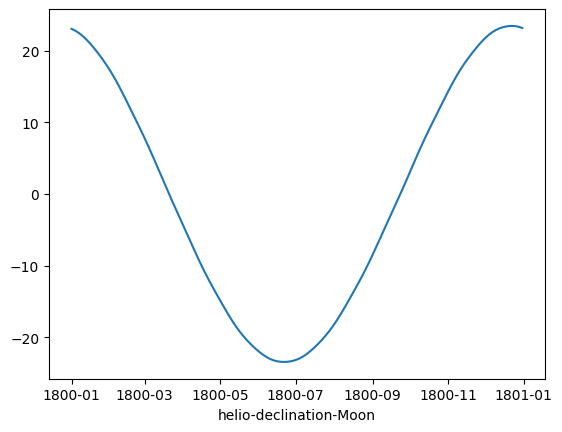

In [15]:
first_column_name = df.columns[0]
plt.plot(df.iloc[:, 0])
plt.xlabel(first_column_name)
plt.show()